In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.preprocessing import StandardScaler

from IPython.display import display, clear_output

cmap_bold = ['darkorange', 'c']#, 'darkblue']

In [2]:
# import data
iris = datasets.load_iris()

X = iris.data[iris.target<2, 2:]
y = iris.target[iris.target<2]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) # 80% training and 20% test

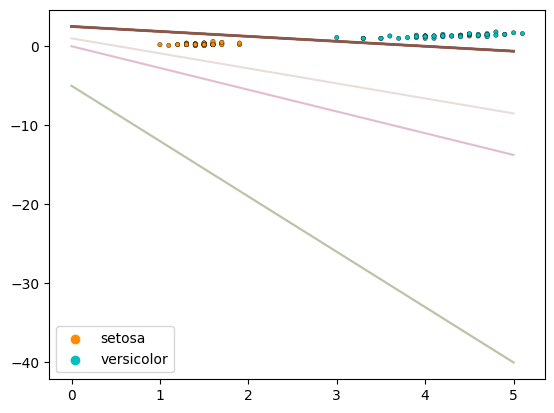

In [3]:
%matplotlib inline

# Without Normalization
clf = Perceptron(eta0 =0.1, warm_start= True)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                        palette=cmap_bold, alpha=1.0, edgecolor="black", s=10)
time.sleep(5)
for epoch in range(5):
    for i in range(X.shape[0]):

        clf.partial_fit(X[i:i+1,:], y[i:i+1],np.unique(y))

        if i%20 == 0:
            
            W = clf.coef_[0]
            b = clf.intercept_ 

            x_hat = np.linspace(0,5,100)
            y_hat = -(b+W[0]*x_hat)/W[1]
            ax.plot(x_hat, y_hat,alpha=0.2)

            display(fig)
    
            clear_output(wait = True)
            plt.pause(0.3)
            
W = clf.coef_[0]
b = clf.intercept_ 

x_hat = np.linspace(0,5,100)
y_hat = -(b+W[0]*x_hat)/W[1]
ax.plot(x_hat, y_hat,lw=2)
display(fig)

In [4]:
# with Normalization
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

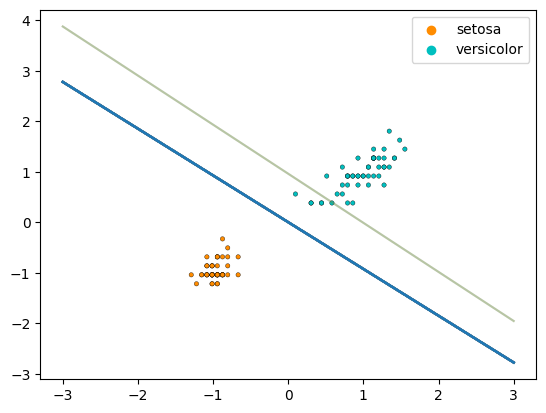

In [5]:
%matplotlib inline

# With Normalization

clf = Perceptron(eta0 =0.1, warm_start= True)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=X_norm[:, 0], y=X_norm[:, 1], hue=iris.target_names[y],
                        palette=cmap_bold, alpha=1.0, edgecolor="black", s=10)

for epoch in range(10):
    for i in range(X_norm.shape[0]):

        clf.partial_fit(X_norm[i:i+1,:], y[i:i+1],np.unique(y))

        if i%20 == 0:
            
            W = clf.coef_[0]
            b = clf.intercept_ 

            x_hat = np.linspace(-3,3,100)
            y_hat = -(b+W[0]*x_hat)/W[1]
            ax.plot(x_hat, y_hat,alpha=0.2)

            display(fig)
    
            clear_output(wait = True)
            plt.pause(0.1)
            
W = clf.coef_[0]
b = clf.intercept_ 

x_hat = np.linspace(-3,3,100)
y_hat = -(b+W[0]*x_hat)/W[1]
ax.plot(x_hat, y_hat,lw=2)
display(fig)